# [2022 Fall] Final Exam - Question 3

> Course: AP3021

In [11]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

### 讀資料

In [12]:
mat_contents = sio.loadmat("./data/cceqs.mat")
sorted(mat_contents.keys())
Tc = mat_contents['Tc'][0]
e = mat_contents['e'][0]

print(len(Tc))
print(Tc)

print()

print(len(e))
print(e)

66
[-30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13
 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35]

66
[ 103.03784717  110.21840143  117.82566779  125.88035082  134.40391071
  143.41857998  152.94738016  163.01413849  173.64350459  184.86096706
  196.69287011  209.16643007  222.30975185  236.15184532  250.72264164
  266.05300947  282.17477102  299.12071809  316.92462788  335.62127874
  355.2464657   375.83701593  397.43080395  420.06676672  443.78491852
  468.62636565  494.63332089  521.84911783  550.31822489  580.08625916
  611.2         643.7074024   677.65761005  713.10096823  750.08903635
  788.67460026  828.91168427  870.8555629   914.56277234  960.09112156
 1007.49970316 1056.84890395 1108.2004151  1161.6172421  1217.1637143
 1274.90549418 1334.90958622 1397.24434553 1461.97948606 1529.18608847
 1598.93660769 

### 確認資料

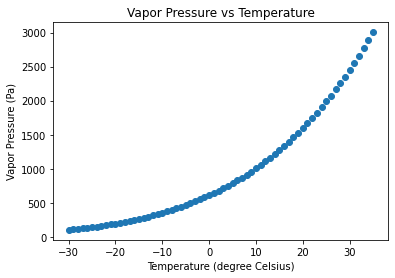

In [13]:
plt.scatter(Tc,e)
plt.title("Vapor Pressure vs Temperature")
plt.ylabel("Vapor Pressure (Pa)")
plt.xlabel("Temperature (degree Celsius)")

plt.show()

#### a. Please construct the C-C equation using the LINEAR regression

### Define the LINEAR regression

In [23]:
def regression(x, y, n):

    sum_x = 0   # the sum of the x
    sum_y = 0   # the sum of the y

    sum_xy = 0  # the sum of the x * y
    sum_x2 = 0  # the sum of the x ^ 2

    st = 0      
    sr = 0      

    for i in range(0, n):
        sum_x += x[i]
        sum_y += y[i]

        sum_xy += x[i] * y[i]
        sum_x2 += x[i] * x[i]

    x_mean = sum_x / n
    y_mean = sum_y / n

    a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x * sum_x)
    a0 = y_mean - a1 * x_mean

    for i in range(0, n):
        st += (y[i] - y_mean) ** 2
        sr += (y[i] - a0 - a1 * x[i]) ** 2

    std_estimate_error = (sr - (n - 2)) ** 0.5
    r2 = (st - sr) / st
    r = ((st - sr) / st) ** 0.5

    return a0, a1, std_estimate_error, r2, r

### Data with the LINEAR regression

In [25]:
data_size = len(Tc)
a0, a1, std_estimate_error, r2, r = regression(Tc, e, data_size)

print("After the LINEAR regression:\n")
print("a0:                              ", a0)
print("a1:                              ", a1)
print("std_estimate_error:              ", std_estimate_error)
print("Coefficient of the determination:", r2)
print("Coefficient of the correlation:  ", r)

After the LINEAR regression:

a0:                               879.9865701296675
a1:                               41.10433052361058
std_estimate_error:               2160.6155885448184
Coefficient of the determination: 0.8965758428578144
Coefficient of the correlation:   0.9468768889659386


### Plot the LINEAR regression to the figure.

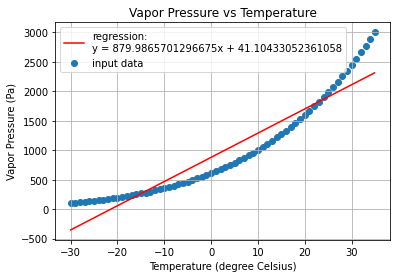

In [22]:
xs = np.arange(-30, 35, 0.1)
ys = a1 * xs + a0
plt.plot(xs, ys, 'r')
plt.scatter(Tc,e)
plt.title("Vapor Pressure vs Temperature")
plt.ylabel("Vapor Pressure (Pa)")
plt.xlabel("Temperature (degree Celsius)")
plt.legend(["regression:\ny = 879.9865701296675x + 41.10433052361058", "input data"])
plt.grid()

plt.show()

#### b. Please determine the goodness of fitting

### Turn to the $ln$